In [1]:
import multiprocessing.popen_spawn_posix
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
c = Client(cluster)
c

/scratch/cnt0024/ige2071/aalbert/conda/caledo/lib/python3.9/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35705 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:33487 Dashboard: http://127.0.0.1:35705/status,Cluster Workers: 8 Cores: 56 Memory: 270.19 GB


In [2]:
import xarray as xr

In [3]:
%time ds=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested',chunks={'x':1000,'y':500})

CPU times: user 795 ms, sys: 334 ms, total: 1.13 s
Wall time: 5.29 s


In [4]:
dscoord=xr.open_dataset('/store/brodeau/TROPICO12/TROPICO12.L125-I/coordinates_TROPICO12.nc')

In [5]:
# General and file management
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import dask.array as da

#For the plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker

import cartopy
cartopy.config['pre_existing_data_dir'] = '/scratch/cnt0024/hmg2840/albert7a/DEV/git/cartopy_data'
import cartopy.crs as ccrs
import cmocean

import warnings
warnings.filterwarnings('ignore')

#Jupyter magics
%matplotlib inline

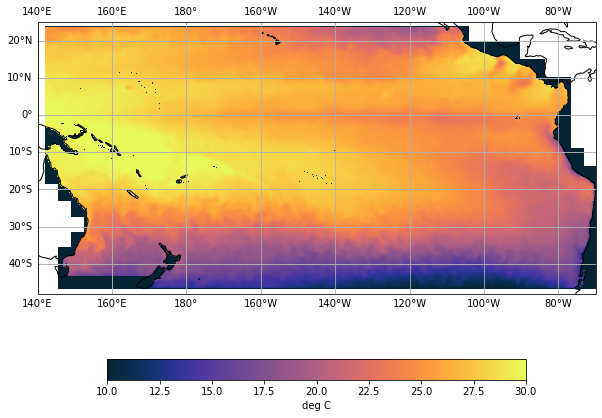

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# cartopy-0.17.0 pyshp-2.1.0

cm = 180
proj = ccrs.PlateCarree(central_longitude=cm)
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines()

# original ax.set_extent((-120, 120, -45, 45)) ?
# Need longitude extent from -60 to +60 on PlateCarree(central_longitude=180)
minlon = -40 + cm
maxlon = +110 + cm
ax.set_extent([minlon, maxlon, -48, 25], ccrs.PlateCarree())
ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), xlocs=[120,140,160,180,200,220,240,260,280])
gl=ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), xlocs=[120,140,160,180,-160,-140,-120,-100,-80])

cs = plt.pcolormesh(dscoord.nav_lon-cm, dscoord.nav_lat, ds.tos[0],transform=proj,cmap=cmocean.cm.thermal,
                    vmin=10,vmax=30)
cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.75,label='deg C')
